In [199]:
import scipy
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LinearRegression
import statsmodels.graphics.gofplots as sgg
import statsmodels.graphics.tsaplots as sgt
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt
import itertools
import time
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [160]:
housing=pd.read_csv("housing.csv")

# changing string to number in ocean proximity
for i in housing.index:
    if housing['ocean_proximity'].loc[i]=='<1H OCEAN':
        housing['ocean_proximity'].loc[i]=1
    elif housing['ocean_proximity'].loc[i]=='INLAND':
        housing['ocean_proximity'].loc[i]=2
    elif housing['ocean_proximity'].loc[i]=='NEAR OCEAN':
        housing['ocean_proximity'].loc[i]=3
    elif housing['ocean_proximity'].loc[i]=='NEAR BAY':
        housing['ocean_proximity'].loc[i]=4
    elif housing['ocean_proximity'].loc[i]=='ISLAND':
        housing['ocean_proximity'].loc[i]=5

# using simpleimputer to fill the nan data with mean value of that column
simputer=SimpleImputer(strategy='mean')
housing_=simputer.fit_transform(housing)

# using pandas to convert back to dataframe form
housing=pd.DataFrame(housing_,columns=housing.columns,index=housing.index)

C:\Users\msmj\AppData\Local\Temp\ipykernel_17928\1580103874.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['ocean_proximity'].loc[i]=4
C:\Users\msmj\AppData\Local\Temp\ipykernel_17928\1580103874.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['ocean_proximity'].loc[i]=4
C:\Users\msmj\AppData\Local\Temp\ipykernel_17928\1580103874.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['ocean_proximity'].l

In [161]:
pearson_corr=[]
for i in housing.columns:
    for j in housing.columns:
        pearson_corr.append([f'({i},{j})',scipy.stats.pearsonr(housing[i],housing[j])[0],scipy.stats.pearsonr(housing[i],housing[j])[1]])

In [162]:
# H0=data is uncorrelated and normally distributed
# second part of each list is corr and third is p-value 
pearson_corr

[['(longitude,longitude)', 0.9999999999999938, 0.0],
 ['(longitude,latitude)', -0.9246644339150327, 0.0],
 ['(longitude,housing_median_age)',
  -0.10819681311244767,
  8.637823911649026e-55],
 ['(longitude,total_rooms)', 0.04456797771665505, 1.496706666839743e-10],
 ['(longitude,total_bedrooms)', 0.0692596692296849, 2.2433239387256212e-23],
 ['(longitude,population)', 0.09977322287464556, 8.09407604987827e-47],
 ['(longitude,households)', 0.05531009278239529, 1.8381931296615876e-15],
 ['(longitude,median_income)', -0.015175865414173866, 0.029238666548057086],
 ['(longitude,median_house_value)',
  -0.04596661511797834,
  3.923322071034864e-11],
 ['(longitude,ocean_proximity)', -0.43987047786599276, 0.0],
 ['(latitude,longitude)', -0.9246644339150327, 0.0],
 ['(latitude,latitude)', 0.9999999999999886, 0.0],
 ['(latitude,housing_median_age)', 0.0111726735306053, 0.10847414871210673],
 ['(latitude,total_rooms)', -0.03609959585612263, 2.1294000999644006e-07],
 ['(latitude,total_bedrooms)', 

In [163]:
# we can see uncorrelated feature with y and correlated feature with y
correlated_y=[]
uncorrelated_y=[]
for i in pearson_corr[80:90]:
    if i[2]<0.05:
        correlated_y.append(i)
    else:
        uncorrelated_y.append(i)

print('uncorrelated with y:\n',uncorrelated_y)
print('\n\ncorrelated with y: ')
for i in correlated_y:
    print(i)

uncorrelated with y:
 []


correlated with y: 
['(median_house_value,longitude)', -0.04596661511797834, 3.923322071034864e-11]
['(median_house_value,latitude)', -0.14416027687465824, 2.93985929070056e-96]
['(median_house_value,housing_median_age)', 0.10562341249320949, 2.761860676107593e-52]
['(median_house_value,total_rooms)', 0.1341531138065629, 1.6893845634440145e-83]
['(median_house_value,total_bedrooms)', 0.04945354544322745, 1.1711890792336793e-12]
['(median_house_value,population)', -0.02464967888889491, 0.0003976307847833607]
['(median_house_value,households)', 0.0658426505700564, 2.823420651899712e-21]
['(median_house_value,median_income)', 0.688075207958547, 0.0]
['(median_house_value,median_house_value)', 0.9999999999999972, 0.0]
['(median_house_value,ocean_proximity)', 0.021732204251455854, 0.0017940462811431546]


In [164]:
# and here we will see the correlations between each feature
features=pearson_corr[:80]+pearson_corr[90:]
correlated_feature=[]
uncorrelated_feature=[]
for i in features:
    if i[2]<0.05:
        correlated_feature.append(i)
    else:
        uncorrelated_feature.append(i)

print('uncorrelated with features:')
for i in uncorrelated_feature:
    print(i)
print('\n\ncorrelated with features: ')
for i in correlated_feature:
    print(i)

uncorrelated with features:
['(latitude,housing_median_age)', 0.0111726735306053, 0.10847414871210673]
['(housing_median_age,latitude)', 0.0111726735306053, 0.10847414871210673]
['(total_bedrooms,median_income)', -0.007681878004470061, 0.26977698639606024]
['(population,median_income)', 0.004834345627652935, 0.48737218220692835]
['(households,median_income)', 0.013033052400705812, 0.06115456567311605]
['(median_income,total_bedrooms)', -0.007681878004470061, 0.26977698639606024]
['(median_income,population)', 0.004834345627652935, 0.48737218220692835]
['(median_income,households)', 0.013033052400705812, 0.06115456567311605]


correlated with features: 
['(longitude,longitude)', 0.9999999999999938, 0.0]
['(longitude,latitude)', -0.9246644339150327, 0.0]
['(longitude,housing_median_age)', -0.10819681311244767, 8.637823911649026e-55]
['(longitude,total_rooms)', 0.04456797771665505, 1.496706666839743e-10]
['(longitude,total_bedrooms)', 0.0692596692296849, 2.2433239387256212e-23]
['(longitu

In [165]:
# as we can see this variables are highly correlated and we cant find useful info so we do a VIF to pick our variables
X_housing=housing.drop(axis=1,columns='median_house_value')
VIF_results=[VIF(X_housing.values,i) for i in range(len(X_housing.columns))]
VIF_df=pd.DataFrame({'variables': X_housing.columns,'VIF':VIF_results })
VIF_df

variables         VIF
0           longitude  655.215489
1            latitude  613.628797
2  housing_median_age    7.480625
3         total_rooms   29.142916
4      total_bedrooms   71.902550
5          population   16.371868
6          households   74.472425
7       median_income    8.018322
8     ocean_proximity    5.557059

In [166]:
# as we can see we should remove lots of variables now i will del variables with VIF more than 10
new_X_housing=housing[['housing_median_age','median_income','ocean_proximity']]
new_Y_housing=housing[['median_house_value']]
new_X_housing

housing_median_age  median_income  ocean_proximity
0                    41.0         8.3252              4.0
1                    21.0         8.3014              4.0
2                    52.0         7.2574              4.0
3                    52.0         5.6431              4.0
4                    52.0         3.8462              4.0
...                   ...            ...              ...
20635                25.0         1.5603              2.0
20636                18.0         2.5568              2.0
20637                17.0         1.7000              2.0
20638                18.0         1.8672              2.0
20639                16.0         2.3886              2.0

[20640 rows x 3 columns]

In [167]:
# now we have all independent variables we need to build our model
res_check_model=LinearRegression(n_jobs=-1)
res_check_model.fit(X=new_X_housing,y=new_Y_housing)
X2 = sm.add_constant(new_X_housing)
est = sm.OLS(new_Y_housing, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     7149.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:08:47   Log-Likelihood:            -2.6251e+05
No. Observations:               20640   AIC:                         5.250e+05
Df Residuals:                   20636   BIC:                         5.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.446e+04   2125

In [168]:
# now its time for checking residuals
y_hat=res_check_model.predict(new_X_housing)
residual=new_Y_housing-y_hat
residual

median_house_value
0            26636.462383
1           -32148.494134
2           -46591.650454
3            12347.174525
4            90874.439967
...                   ...
20635       -22945.957512
20636       -54995.011194
20637        -1066.342561
20638       -17603.836255
20639       -31999.973452

[20640 rows x 1 columns]

In [169]:
# now we should extract residual numbers from dataframe
res_num=[] # we store those residual numbers in this list
y_num=[]
for i in residual.values:
    for j in i:
        res_num.append(j)
    
for i in new_Y_housing.values:
    for j in i:
        y_num.append(j)

In [170]:
# now we do a Kolmogorov-Smirnov test,we will give "res_num" to test if our residual is normally distributed
print(scipy.stats.kstest((res_num-np.mean(res_num))/np.std(res_num),'norm'))
print(scipy.stats.kstest(res_num,'norm'))
print(scipy.stats.shapiro(res_num))

KstestResult(statistic=0.08863791425105016, pvalue=1.5061204710854065e-141, statistic_location=0.15294884130962164, statistic_sign=1)
KstestResult(statistic=0.5824127906863279, pvalue=0.0, statistic_location=-6.68755521660205, statistic_sign=1)
ShapiroResult(statistic=0.9302467107772827, pvalue=0.0)


c:\Users\msmj\anaconda3\envs\tensorflow_gpu\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


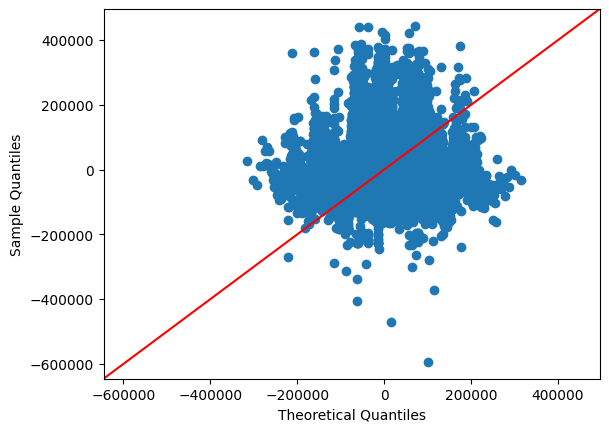

In [171]:
# QQ plot
qqplot=sgg.qqplot(residual,line='45',loc=np.mean(residual),scale=np.std(residual))
plt.show()

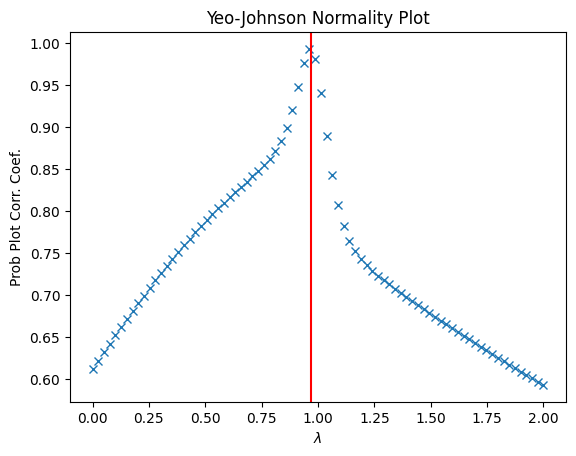

In [196]:
nm=scipy.stats.yeojohnson_normmax(res_num)
fig = plt.figure()
ax = fig.add_subplot(111)
prob=scipy.stats.yeojohnson_normplot(res_num,0,2,plot=ax)
plt.axvline(nm,color='r')
plt.show()

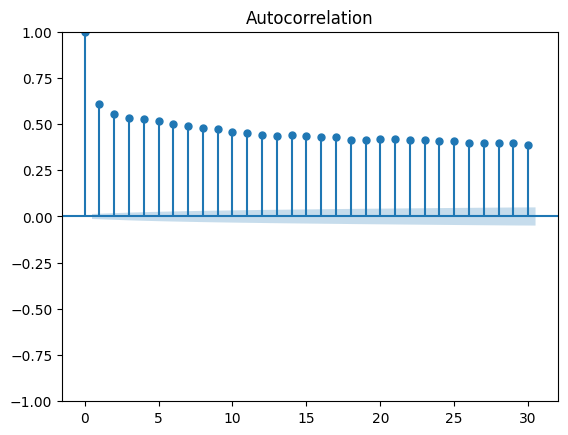

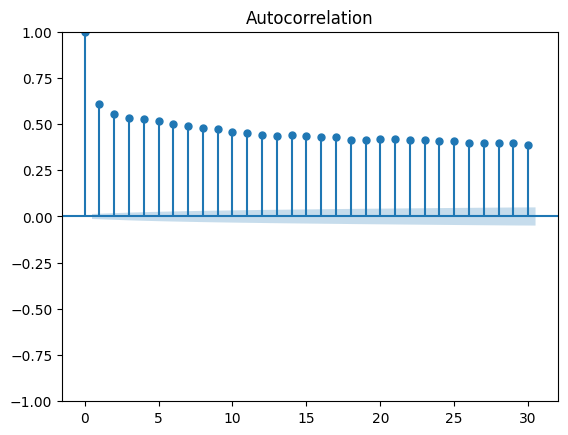

In [225]:
# residuals are highly correlated
sgt.plot_acf(residual,lags=30)

In [173]:
# as we can see residuals are somewhat normalized...
pt=PowerTransformer(method='yeo-johnson').fit(residual)
lmbda=pt.lambdas_
new_normal_y=scipy.stats.boxcox(y_num)
new_new_normal_y=scipy.stats.boxcox(y_num,lmbda=lmbda)

In [174]:
# now we build a another model
new_model=LinearRegression(n_jobs=-1)
new_model.fit(X=new_X_housing,y=new_normal_y[0])

new_new_model=LinearRegression(n_jobs=-1)
new_new_model.fit(X=new_X_housing,y=new_new_normal_y)

LinearRegression(n_jobs=-1)

In [175]:
# now its time for checking residuals
new_y_hat=new_model.predict(new_X_housing)
new_residual=new_normal_y[0]-new_y_hat
print(new_residual)

new_new_y_hat=new_new_model.predict(new_X_housing)
new_new_residual=new_new_normal_y-new_new_y_hat
print(new_new_residual)

[-0.09420342 -0.57500697 -0.72704969 ... -0.52556719 -1.06905619
 -1.26141065]
[ 17300.38736379 -21465.01461406 -31073.41088967 ...  -1324.41502011
 -12667.1525647  -22305.094277  ]


In [176]:
# now we do a Kolmogorov-Smirnov test,we will give "new_residual" to test if our residual is normally distributed
print(scipy.stats.kstest((new_residual-np.mean(new_residual))/np.std(new_residual),'norm'))
print(scipy.stats.kstest(new_residual,np.random.normal(loc=np.mean(new_residual),scale=np.std(new_residual),size=len(new_residual))))
print(scipy.stats.shapiro(new_residual))

print('\n\n')

print(scipy.stats.kstest((new_new_residual-np.mean(new_new_residual))/np.std(new_new_residual),'norm'))
print(scipy.stats.kstest(new_new_residual,np.random.normal(loc=np.mean(new_new_residual),scale=np.std(new_new_residual),size=len(new_new_residual))))
print(scipy.stats.shapiro(new_new_residual))

KstestResult(statistic=0.022471296305388244, pvalue=1.7412453573270986e-09, statistic_location=0.5248454192997561, statistic_sign=1)
KstestResult(statistic=0.022480620155038822, pvalue=5.807373731708235e-05, statistic_location=0.7092730382753203, statistic_sign=1)
ShapiroResult(statistic=0.9952442049980164, pvalue=3.856022116125644e-25)



KstestResult(statistic=0.08602197280420554, pvalue=2.498221810950327e-133, statistic_location=0.15798778215811377, statistic_sign=1)
KstestResult(statistic=0.08750000000000002, pvalue=3.3922563752246083e-69, statistic_location=8694.727870795643, statistic_sign=1)
ShapiroResult(statistic=0.933271050453186, pvalue=0.0)


c:\Users\msmj\anaconda3\envs\tensorflow_gpu\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


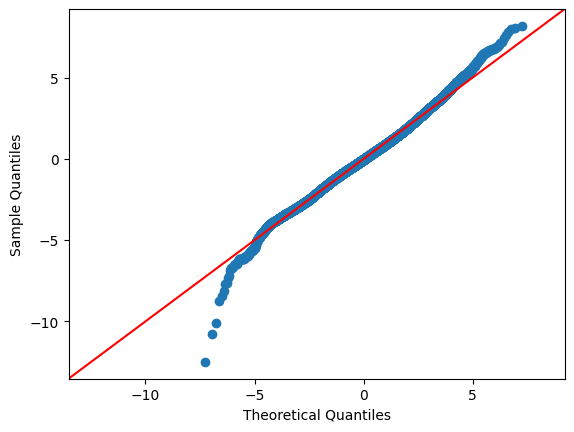

In [177]:
# QQ plot
qqplot=sgg.qqplot(new_residual,line='45',loc=np.mean(new_residual),scale=np.std(new_residual))
plt.show()
# hmmm... better

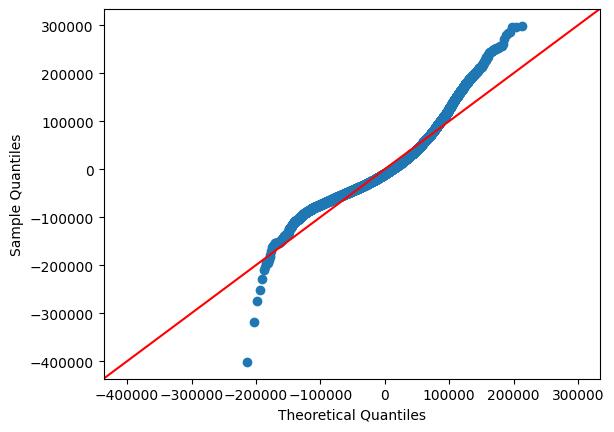

In [178]:
# QQ plot for new_new_residual
qqplot=sgg.qqplot(new_new_residual,line='45',loc=np.mean(new_new_residual),scale=np.std(new_new_residual))
plt.show()


In [179]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [180]:
#Importing tqdm for the progress bar
from tqdm import tnrange

#Initialization variables
Y = new_normal_y[0]
Y2=new_new_normal_y
X = new_X_housing

k = 3
RSS_list, R_squared_list, feature_list = [],[],[]
numb_features = []

#Looping over k = 1 to k = 3 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 3 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

C:\Users\msmj\AppData\Local\Temp\ipykernel_17928\706244130.py:14: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/3 [00:00<?, ?it/s]

In [181]:
k = 3
RSS_list2, R_squared_list2, feature_list2 = [],[],[]
numb_features2 = []

#Looping over k = 1 to k = 3 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 3 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result2 = fit_linear_reg(X[list(combo)],Y2)   #Store temp result 
        RSS_list2.append(tmp_result2[0])                  #Append lists
        R_squared_list2.append(tmp_result2[1])
        feature_list2.append(combo)
        numb_features2.append(len(combo))   

#Store in DataFrame
df2 = pd.DataFrame({'numb_features': numb_features2,'RSS': RSS_list2, 'R_squared':R_squared_list2,'features':feature_list2})

C:\Users\msmj\AppData\Local\Temp\ipykernel_17928\1928732419.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):


Loop...:   0%|          | 0/3 [00:00<?, ?it/s]

In [182]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min)
display(df_max)

print('\n\n')

df_min2 = df2[df2.groupby('numb_features')['RSS'].transform(min) == df2['RSS']]
df_max2 = df2[df2.groupby('numb_features')['R_squared'].transform(max) == df2['R_squared']]
display(df_min2)
display(df_max2)

numb_features           RSS  R_squared  \
1              1  75377.832738   0.443671   
3              2  71868.141643   0.469575   
6              3  71863.800881   0.469607   

                                            features  
1                                   (median_income,)  
3                (housing_median_age, median_income)  
6  (housing_median_age, median_income, ocean_prox...

numb_features           RSS  R_squared  \
1              1  75377.832738   0.443671   
3              2  71868.141643   0.469575   
6              3  71863.800881   0.469607   

                                            features  
1                                   (median_income,)  
3                (housing_median_age, median_income)  
6  (housing_median_age, median_income, ocean_prox...

numb_features           RSS  R_squared  \
1              1  6.616744e+13   0.473510   
3              2  6.171669e+13   0.508924   
6              3  6.165787e+13   0.509392   

                                            features  
1                                   (median_income,)  
3                (housing_median_age, median_income)  
6  (housing_median_age, median_income, ocean_prox...

numb_features           RSS  R_squared  \
1              1  6.616744e+13   0.473510   
3              2  6.171669e+13   0.508924   
6              3  6.165787e+13   0.509392   

                                            features  
1                                   (median_income,)  
3                (housing_median_age, median_income)  
6  (housing_median_age, median_income, ocean_prox...

In [183]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
display(df.head(10))

print('\n\n')

df2['min_RSS'] = df2.groupby('numb_features')['RSS'].transform(min)
df2['max_R_squared'] = df2.groupby('numb_features')['R_squared'].transform(max)
df2.head(10)

numb_features            RSS  R_squared  \
0              1  134613.204499   0.006483   
1              1   75377.832738   0.443671   
2              1  135479.914436   0.000086   
3              2   71868.141643   0.469575   
4              2  134552.473642   0.006931   
5              2   75337.842423   0.443966   
6              3   71863.800881   0.469607   

                                            features       min_RSS  \
0                              (housing_median_age,)  75377.832738   
1                                   (median_income,)  75377.832738   
2                                 (ocean_proximity,)  75377.832738   
3                (housing_median_age, median_income)  71868.141643   
4              (housing_median_age, ocean_proximity)  71868.141643   
5                   (median_income, ocean_proximity)  71868.141643   
6  (housing_median_age, median_income, ocean_prox...  71863.800881   

   max_R_squared  
0       0.443671  
1       0.443671  
2       0.443671  
3       0.469575  
4       0.469575  
5       0.469575  
6       0.469607

numb_features           RSS  R_squared  \
0              1  1.242925e+14   0.011012   
1              1  6.616744e+13   0.473510   
2              1  1.256225e+14   0.000429   
3              2  6.171669e+13   0.508924   
4              2  1.242886e+14   0.011043   
5              2  6.587722e+13   0.475819   
6              3  6.165787e+13   0.509392   

                                            features       min_RSS  \
0                              (housing_median_age,)  6.616744e+13   
1                                   (median_income,)  6.616744e+13   
2                                 (ocean_proximity,)  6.616744e+13   
3                (housing_median_age, median_income)  6.171669e+13   
4              (housing_median_age, ocean_proximity)  6.171669e+13   
5                   (median_income, ocean_proximity)  6.171669e+13   
6  (housing_median_age, median_income, ocean_prox...  6.165787e+13   

   max_R_squared  
0       0.473510  
1       0.473510  
2       0.473510  
3       0.508924  
4       0.508924  
5       0.508924  
6       0.509392

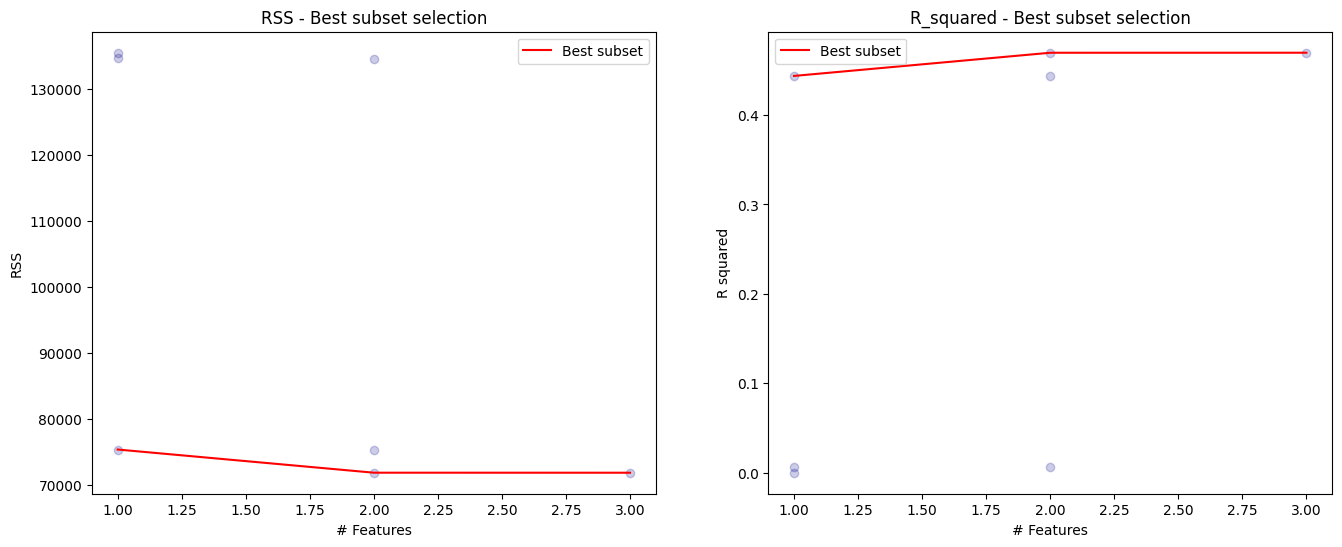

In [184]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

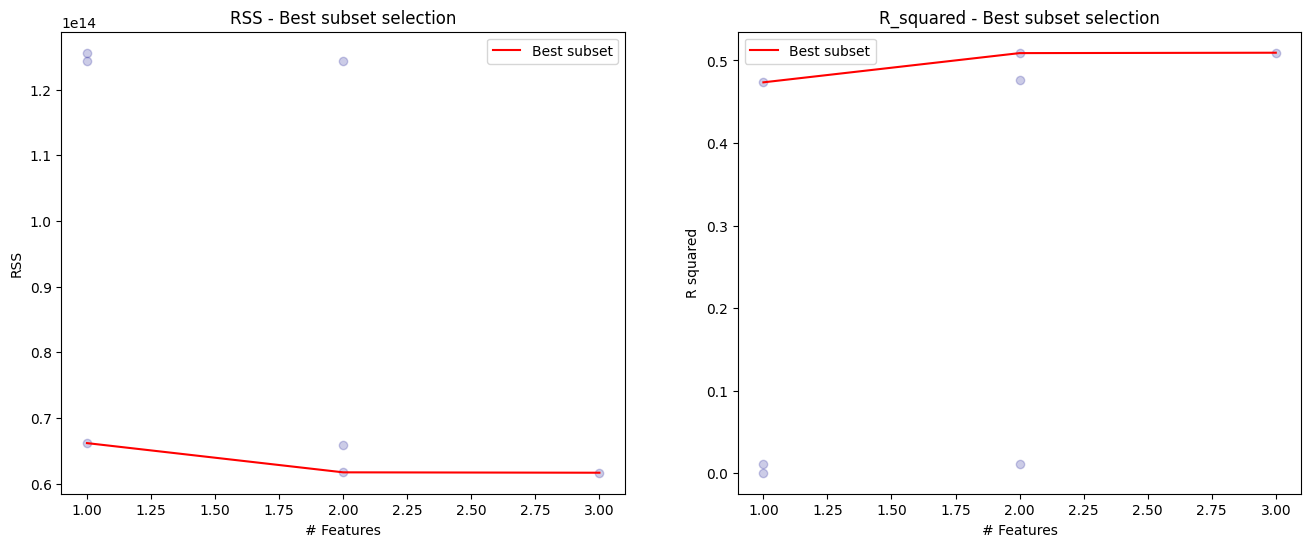

In [185]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df2.numb_features,df2.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df2.numb_features,df2.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df2.numb_features,df2.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df2.numb_features,df2.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

In [221]:
# (housing_median_age, median_income)
X22 = sm.add_constant(new_X_housing)
est2 = sm.OLS(new_normal_y[0], X22).fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     6090.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:32:18   Log-Likelihood:                -42162.
No. Observations:               20640   AIC:                         8.433e+04
Df Residuals:                   20636   BIC:                         8.436e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 23.7743      0

In [222]:
X222 = sm.add_constant(new_X_housing)
est22= sm.OLS(new_new_normal_y, X222).fit()
print(est22.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     7142.
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:32:21   Log-Likelihood:            -2.5444e+05
No. Observations:               20640   AIC:                         5.089e+05
Df Residuals:                   20636   BIC:                         5.089e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4969.4736   1437